In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터

In [2]:
samsung = pd.read_csv('/content/005930.KS.csv')
samsung.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.916016,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.599609,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.659668,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.537598,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.392578,46880000


In [3]:
# 시계열 데이터로 처리할때는 날짜를 index로 처리하는게 좋다.
df = samsung.copy()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.916016,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.599609,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.659668,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.537598,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.392578,46880000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779 entries, 0 to 5778
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5779 non-null   object 
 1   Open       5779 non-null   float64
 2   High       5779 non-null   float64
 3   Low        5779 non-null   float64
 4   Close      5779 non-null   float64
 5   Adj Close  5779 non-null   float64
 6   Volume     5779 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 316.2+ KB


In [5]:
# datetime 으로 바꿔준다.
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.916016,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.599609,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.659668,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.537598,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.392578,46880000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779 entries, 0 to 5778
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5779 non-null   datetime64[ns]
 1   Open       5779 non-null   float64       
 2   High       5779 non-null   float64       
 3   Low        5779 non-null   float64       
 4   Close      5779 non-null   float64       
 5   Adj Close  5779 non-null   float64       
 6   Volume     5779 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 316.2 KB


In [7]:
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.916016,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.599609,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.659668,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.537598,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.392578,46880000


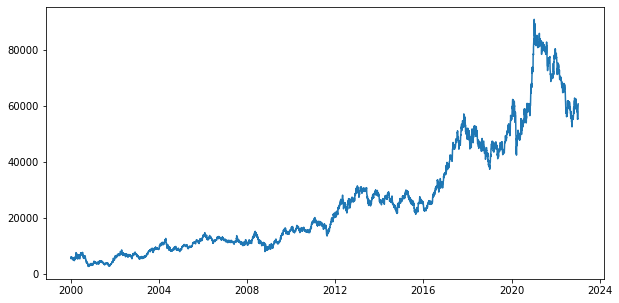

In [8]:
plt.figure(figsize=(10,5))
plt.plot(df.index,df['Close'])
plt.show()

In [10]:
# feature 추가
# 윈도우를 계산한다. 3일의 평균을 계속 넣어준다.
df['MA3'] = np.around(df['Close'].rolling(window=3).mean(),0)

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA3
Date,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.916016,74195000,NaN
2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.599609,74680000,NaN
2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.659668,54390000,5770.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.537598,40305000,5580.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.392578,46880000,5643.0


In [13]:
df['MA5'] = np.around(df['Close'].rolling(window=5).mean(),0)
df['Mid'] = (df['High']+df['Low'])/2

df.head()

,Open,High,Low,Close,Adj Close,Volume,MA3,MA5,Mid
Date,,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.916016,74195000,NaN,NaN,5885.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.599609,74680000,NaN,NaN,5790.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.659668,54390000,5770.0,NaN,5680.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.537598,40305000,5580.0,NaN,5515.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.392578,46880000,5643.0,5724.0,5675.0


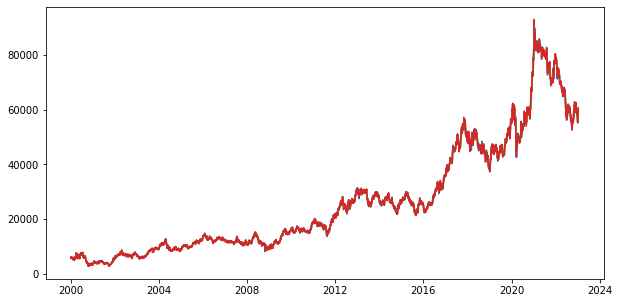

In [15]:
plt.figure(figsize=(10,5))
plt.plot(df.index,df['Close'])
plt.plot(df.index,df['MA3'])
plt.plot(df.index,df['MA5'])
plt.plot(df.index,df['Mid'])
plt.show()

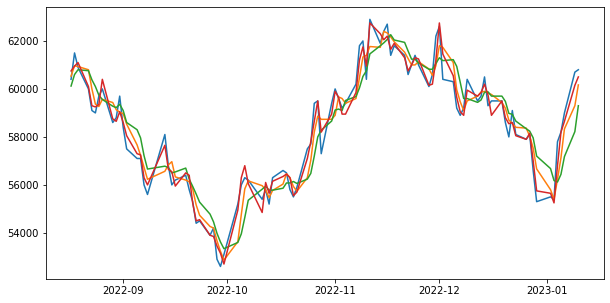

In [18]:
# 현재에서 마이너스까지 200개를 뽑아온다.
x = df.iloc[-100:,:]

plt.figure(figsize=(10,5))
plt.plot(x.index,x['Close'])
plt.plot(x.index,x['MA3'])
plt.plot(x.index,x['MA5'])
plt.plot(x.index,x['Mid'])
plt.show()

In [19]:
# NaN값 없애기
df.isna().sum(axis=0)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA3          2
MA5          4
Mid          0
dtype: int64

In [21]:
df.loc[df['Volume']==0]

,Open,High,Low,Close,Adj Close,Volume,MA3,MA5,Mid
Date,,,,,,,,,
2000-02-04,5130.0,5130.0,5130.0,5130.0,3855.405518,0,5170.0,5282.0,5130.0
2000-03-01,5120.0,5120.0,5120.0,5120.0,3847.889648,0,5013.0,5046.0,5120.0
2000-04-05,6800.0,6800.0,6800.0,6800.0,5110.478516,0,6900.0,6890.0,6800.0
2000-04-13,6910.0,6910.0,6910.0,6910.0,5193.147949,0,6973.0,7084.0,6910.0
2000-05-01,6000.0,6000.0,6000.0,6000.0,4509.246582,0,5800.0,5728.0,6000.0
...,...,...,...,...,...,...,...,...,...
2022-02-28,71900.0,71900.0,71900.0,71900.0,70610.367188,0,71767.0,72780.0,71900.0
2022-03-04,72900.0,72900.0,72900.0,72900.0,71592.437500,0,72500.0,72260.0,72900.0
2022-03-10,69500.0,69500.0,69500.0,69500.0,68253.414063,0,69700.0,70980.0,69500.0


In [24]:
df['Volume'] = df['Volume'].replace(0,np.nan)
df.isna().sum(axis=0)

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       127
MA3            2
MA5            4
Mid            0
dtype: int64

In [25]:
df = df.dropna()

In [26]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA3          0
MA5          0
Mid          0
dtype: int64

In [28]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA3,MA5,Mid
Date,,,,,,,,,
2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.392578,46880000.0,5643.0,5724.0,5675.0
2000-01-11,5820.0,6100.0,5770.0,5770.0,4336.392578,59745000.0,5693.0,5656.0,5935.0
2000-01-12,5610.0,5740.0,5600.0,5720.0,4298.815918,29220000.0,5753.0,5684.0,5670.0
2000-01-13,5600.0,5740.0,5560.0,5710.0,4291.298828,41190000.0,5733.0,5702.0,5650.0
2000-01-14,5720.0,5880.0,5680.0,5830.0,4381.483887,49375000.0,5753.0,5760.0,5780.0


In [29]:
# rnn 데이터를 잘라야한다. (시간,몇개넣을지)

def make_sequence_dataset(X,y,window_size=20):
  feature_list = []
  label_list = []

  for i in range(len(X)-window_size):
    feature_list.append(X[i:i+window_size])
    label_list.append(y[i+window_size])

  return np.array(feature_list),np.array(label_list)

In [40]:
X = df_scaled.drop(['Close','Adj Close'],axis=1)
y = df_scaled['Close']
y.head()

0    0.034440
1    0.034440
2    0.033873
3    0.033760
4    0.035120
Name: Close, dtype: float64

In [41]:
X_data,y_data = make_sequence_dataset(X,y,20)
print(X_data.shape,y_data.shape)

(5628, 20, 7) (5628,)


In [42]:
train_size = int(len(X_data)*0.8)
train_size

4502

In [43]:
X_train = X_data[0:train_size]
X_test = X_data[train_size:]

y_train = y_data[0:train_size]
y_test = y_data[train_size:]

In [45]:
X_train.shape,X_test.shape

((4502, 20, 7), (1126, 20, 7))

### model

In [50]:
model = keras.Sequential()
# rnn 2차원으로 들어간다. 윈도우사이즈랑 7개 columns
model.add(layers.LSTM(32,activation='tanh',input_shape=(20,7)))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32)                5120      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(
    loss='mse',
    # 보통 rnn에선 rmsprop을 사용한다.
    optimizer='rmsprop',
    metrics=['mae']
)

In [52]:
EPOCHS = 100
BATCH_SIZE = 32


log = model.fit(
    X_train,y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
113/113 [==============================] - 5s 17ms/step - loss: 5.3028e-04 - mae: 0.0123 - val_loss: 6.8864e-04 - val_mae: 0.0181
Epoch 2/100
113/113 [==============================] - 1s 11ms/step - loss: 1.1547e-04 - mae: 0.0082 - val_loss: 0.0026 - val_mae: 0.0436
Epoch 3/100
113/113 [==============================] - 1s 12ms/step - loss: 8.4291e-05 - mae: 0.0070 - val_loss: 5.2725e-04 - val_mae: 0.0158
Epoch 4/100
113/113 [==============================] - 1s 11ms/step - loss: 7.1997e-05 - mae: 0.0065 - val_loss: 2.4475e-04 - val_mae: 0.0122
Epoch 5/100
113/113 [==============================] - 1s 11ms/step - loss: 5.7313e-05 - mae: 0.0058 - val_loss: 5.1951e-04 - val_mae: 0.0164
Epoch 6/100
113/113 [==============================] - 1s 11ms/step - loss: 4.8203e-05 - mae: 0.0054 - val_loss: 2.0213e-04 - val_mae: 0.0124
Epoch 7/100
113/113 [==============================] - 1s 11ms/step - loss: 4.8046e-05 - mae: 0.0053 - val_loss: 7.4075e-04 - val_mae: 0.0214
Epoch 8/10

In [53]:
log.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [56]:
## 시각화

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['mae'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

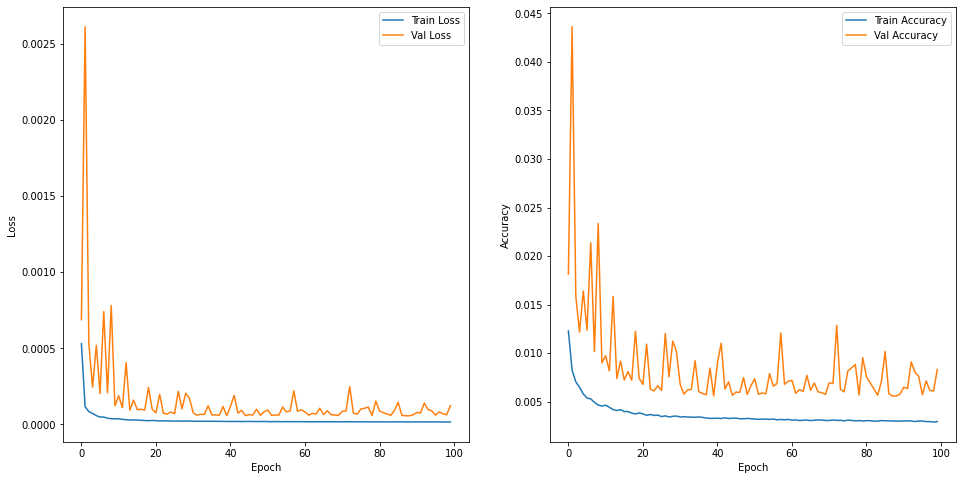

In [57]:
plot_history(log)

In [58]:
model.evaluate(X_train,y_train)

141/141 [==============================] - 1s 9ms/step - loss: 3.5785e-05 - mae: 0.0038


[3.578502219170332e-05, 0.0038363495841622353]

In [61]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1)

36/36 [==============================] - 0s 5ms/step


In [62]:
for i in range(10):
  print(f'True : {y_test[i]} Pred : {y_pred}')

True : 0.5615724481703863 Pred : [0.54583925 0.5473586  0.5380141  ... 0.6080222  0.61587816 0.63378125]
True : 0.5502435708621276 Pred : [0.54583925 0.5473586  0.5380141  ... 0.6080222  0.61587816 0.63378125]
True : 0.5298515917072618 Pred : [0.54583925 0.5473586  0.5380141  ... 0.6080222  0.61587816 0.63378125]
True : 0.5434462444771724 Pred : [0.54583925 0.5473586  0.5380141  ... 0.6080222  0.61587816 0.63378125]
True : 0.5502435708621276 Pred : [0.54583925 0.5473586  0.5380141  ... 0.6080222  0.61587816 0.63378125]
True : 0.5479777954004759 Pred : [0.54583925 0.5473586  0.5380141  ... 0.6080222  0.61587816 0.63378125]
True : 0.5502435708621276 Pred : [0.54583925 0.5473586  0.5380141  ... 0.6080222  0.61587816 0.63378125]
True : 0.5423133567463465 Pred : [0.54583925 0.5473586  0.5380141  ... 0.6080222  0.61587816 0.63378125]
True : 0.5315509233035006 Pred : [0.54583925 0.5473586  0.5380141  ... 0.6080222  0.61587816 0.63378125]
True : 0.5343831426305653 Pred : [0.54583925 0.5473586 